# 1.) Nearest Neighbor Classification
You are given the points belonging to class-1 and class-2 as follows:

Class 1 points: (11,11),(13,11),(8,10),(9,9),(7,7),(7,5),(16,3)

Class 2 points: (7,11),(15,9),(15,7),(13,5),(14,4),(9,3),(11,3)

What is the label of the sample (14,3) using the nearest neighbor classifier using L2 distance?

In [2]:
import math

points = [[11,11],[13,11],[8,10],[9,9],[7,7],[7,5],[16,3],
              [7,11],[15,9],[15,7],[13,5],[14,4],[9,3],[11,3]]
classes = [1,1,1,1,1,1,1,2,2,2,2,2,2,2]
test = [14,3]
min = float("inf")
label = "TBD"
for i in range(len(points)):
    dist = math.sqrt((points[i][0] - test[0])**2 + (points[i][1] - test[1])**2)
    if dist < min:
        label = classes[i]
        min = dist
    print("L2", points[i], "and", test, "=", dist)
print("The point", test, "is labeled as class", label, "with a L2 distance of", min)


L2 [11, 11] and [14, 3] = 8.54400374531753
L2 [13, 11] and [14, 3] = 8.06225774829855
L2 [8, 10] and [14, 3] = 9.219544457292887
L2 [9, 9] and [14, 3] = 7.810249675906654
L2 [7, 7] and [14, 3] = 8.06225774829855
L2 [7, 5] and [14, 3] = 7.280109889280518
L2 [16, 3] and [14, 3] = 2.0
L2 [7, 11] and [14, 3] = 10.63014581273465
L2 [15, 9] and [14, 3] = 6.082762530298219
L2 [15, 7] and [14, 3] = 4.123105625617661
L2 [13, 5] and [14, 3] = 2.23606797749979
L2 [14, 4] and [14, 3] = 1.0
L2 [9, 3] and [14, 3] = 5.0
L2 [11, 3] and [14, 3] = 3.0
The point [14, 3] is labeled as class 2 with a L2 distance of 1.0


.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  

# 5.) Implementing a Linear Regression Model From Scratch

# Introduction

Linear regression generally have the form of $Y_{i} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ...$ <br>
There are several ways to find the coefficients of the regression: <br>
1. Linear Algebra: $\hat{\theta} = (X^{T}X)^{-1}X^{T}Y$ (When X is invertible) <br>
2. Gradient Descent: In this case, we need to write out the loss function and try to minimize the loss. <br>
$\hspace{30mm}$ $F(x)$ = Loss Function = MSE = $ \frac{1}{n}\sum^{n}_{i=1} (Y_{i} - \hat{Y_{i}})^{2}$ <br>

In this part of the assignment, we will be using the second way to implement this linear regression model. More details about the model's implementation can be found in corresponding lectures.

### <font color='red'>ATTENTION: THERE ARE A TOTAL OF 4 QUESTIONS THAT NEED YOUR ANSWERS</font>

## Import necessary packages

You'll be implement your model in `LinearRegression.py` which should be put under the same directory as the location of `Linear_Regression.ipynb`. Since we have enabled `autoreload`, you only need to import these packages once. You don't need to restart the kernel of this notebook nor rerun the next cell even if you change your implementation for `LinearRegression.py` in the meantime.

A suggestion for better productivity if you never used jupyter notebook + python script together: you can split your screen into left and right parts, and have your left part displaying this notebook and have your right part displaying your `LinearRegression.py`

In [29]:
# Please do not change this code block
%load_ext autoreload
%autoreload 2

# import numpy, pandas, pyplot for arrays, dataframes, and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn model to validate our custom model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Please make sure that your `LinearRegression.py` is under the same folder as this .ipynb notebook
from LinearRegression import Linear_Regression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiment 1: Perfect Data

In this part, we generate a dataset with a perfect linear relationship to test our model's performance. Here, we use the equation: $y = 5x + 10$ to generate our dataset.

In [48]:
X = np.array([np.arange(1, 1000, 5)]).T
y = np.array((5 * X)).flatten() +  10
f'x = {X[:5].flatten()}, y = {y[:5]} for the first 5 values'

'x = [ 1  6 11 16 21], y = [ 15  40  65  90 115] for the first 5 values'

First, let's try to fit our model without any normalization (note: the below cell block could take significant amount of time to complete)

In [31]:
%%time
%reload_ext autoreload
reg = Linear_Regression(num_iter = 10000000)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[-0.50727732]
 [ 0.04103011]]
Loss: 888736792845661.0
-----------------------
Iteration: 1000000
Coef: [[5.00970719]
 [3.55331921]]
Loss: 2087.4072684438697
-----------------------
Iteration: 2000000
Coef: [[5.00628697]
 [5.82356024]]
Loss: 876.0774343601329
-----------------------
Iteration: 3000000
Coef: [[5.00407345]
 [7.29432103]]
Loss: 367.6915700542073
-----------------------
Iteration: 4000000
Coef: [[5.00263955]
 [8.24714339]]
Loss: 154.32154307696996
-----------------------
Iteration: 5000000
Coef: [[5.00171003]
 [8.86442345]]
Loss: 64.76883909744302
-----------------------
Iteration: 6000000
Coef: [[5.00110751]
 [9.26432398]]
Loss: 27.18329112610115
-----------------------
Iteration: 7000000
Coef: [[5.0007177 ]
 [9.52339712]]
Loss: 11.408938803994742
-----------------------
Iteration: 8000000
Coef: [[5.00046503]
 [9.69123592]]
Loss: 4.788361602513329
-----------------------
Iteration: 9000000
Coef: [[5.00030135]
 [9.7

Then, let's try to fit our model with min-max normalization

In [32]:
%%time
reg_norm = Linear_Regression(num_iter = 10000000, normalize=True)
reg_norm.fit(X,y)
print(f'\nNumber of total iterations: {len(reg_norm.loss)} \nBest Loss: {min(reg_norm.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[2.90951212]
 [5.90247701]]
Loss: 1661316534.6964731
-----------------------
End Training (Early Stopped at iteration 1383)

Number of total iterations: 1383 
Best Loss: 1.182003936834197e-23
CPU times: total: 31.2 ms
Wall time: 31.2 ms


Now, let's compare the performance between these two models with/without normalization

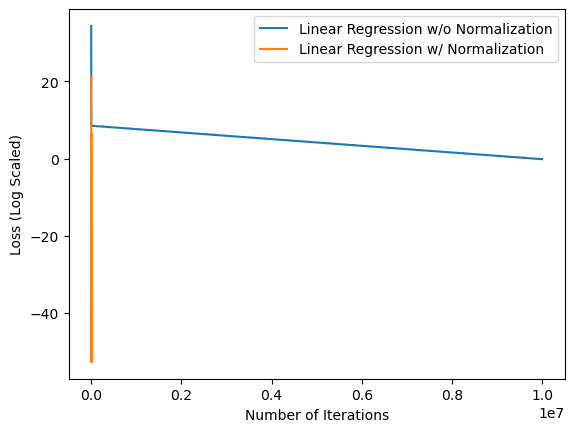

In [33]:
plt.plot(np.log(reg.loss), label='Linear Regression w/o Normalization')
plt.plot(np.log(reg_norm.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

<font color='red'>**Question 1: What conclusions can you draw from this experiment? Did normalization help? How and why?**
</font>

 - **Normalization drastically helped with run time and decreased overall loss by a noticeable amount**
 - **The use of normalization helps with faster convergence during gradient descent because the rescaling of all features to the same range (mean 0, variance 1) means that there is a reducation in overshooting/oscillating back and forth due to large feature values. Although it doesn't happen here, if you don't normalize there is a chance that the loss**
 - **The use of normalization helps with less overall loss since all feature values contribute proportionally to the function preventing against larger values dominating the model fit**

# Experiment 2: Real-World Data

After you complete the first experiment, let's see how our model performs against real-world data.

The below dataset is taken from the [Boston Housing dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), where there are 13 features and 1 target variable.

0. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2. INDUS - proportion of non-retail business acres per town.
3. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4. NOX - nitric oxides concentration (parts per 10 million)
5. RM - average number of rooms per dwelling
6. AGE - proportion of owner-occupied units built prior to 1940
7. DIS - weighted distances to five Boston employment centres
8. RAD - index of accessibility to radial highways
9. TAX - full-value property-tax rate per \$10,000
10. PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - \% lower status of the population
13. MEDV (**TARGET VARIABLE y**) - Median value of owner-occupied homes in $1000's

In [34]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url, delimiter='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [35]:
X, y = np.array(df.drop(13, axis=1)), np.array(df[13])

In [36]:
X.min(axis = 0)

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

Now, let's use the data to fit our model

In [37]:
%%time
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X,y)
print(f'\nNumber of total iterations: {len(reg.loss)} \nBest Loss: {min(reg.loss)}')

Start Training
-----------------------
Iteration: 0
Coef: [[-0.46249421]
 [-0.25393854]
 [ 0.80407772]
 [-0.07477705]
 [-0.82498313]
 [ 0.69835541]
 [-0.9338743 ]
 [ 0.54917705]
 [-0.45997956]
 [-0.53571181]
 [ 0.77542183]
 [ 0.53608298]
 [ 0.95345804]
 [ 0.16174536]]
Loss: 279408.95121322386
-----------------------
End Training (Early Stopped at iteration 23935)

Number of total iterations: 23935 
Best Loss: 11078.784577955517
CPU times: total: 578 ms
Wall time: 586 ms


Let's visualize the loss curve of our model on this dataset

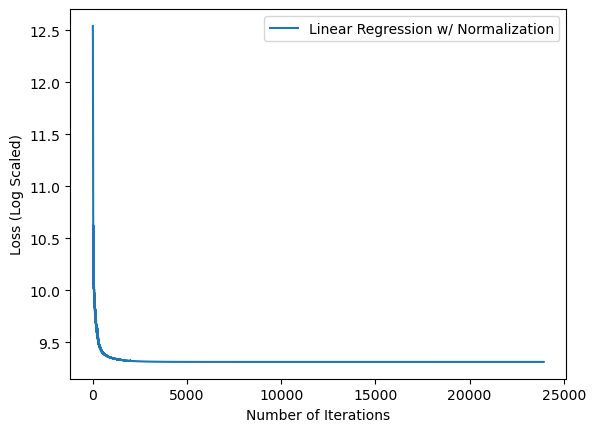

In [38]:
plt.plot(np.log(reg.loss), label='Linear Regression w/ Normalization')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Log Scaled)")
plt.legend()
plt.show()

To verify our model, we can compare our model's performance with respect to the linear regression model implemented in scikit-learn (a.k.a. `sklearn`). Scikit-learn is a popular machine learning library in python that provides many classical machine learning algorithms for many different tasks (regression, classification, clustering, etc). It also contains utility functions for preprocessing, calculating metrics, etc.

If you implemented your model correctly, you should get a very similar output (difference < 1e-3) for RMSE (Root Mean Squared Error) compared to sklearn linear regressor's RMSE.

In [39]:
m, n = df.shape
X_norm = X.copy()

# TODO: normalize X using the procedure in your model implementation
X_norm = np.zeros(X.shape)
maxVal = np.zeros((1, X.shape[1]))
minVal = np.zeros((1, X.shape[1]))
for i in range(X.shape[1]):
    maxVal[:, i] = X[:, i].max()
    minVal[:, i] = X[:, i].min()
    
for i in range(X.shape[1]):
    X_norm[:, i] = (X[:, i] - minVal[:, i]) / (maxVal[:, i] - minVal[:, i])
# Let's build a model with sklearn
lr = LinearRegression()
lr.fit(X_norm,y)

#Compare Root Mean Squared Error.
print(f"Our Model's RMSE: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nSklearn Model's RMSE: {(sum((lr.predict(X_norm) - y)**2)/m)**0.5}")

Our Model's RMSE: 4.679191295697398
Sklearn Model's RMSE: 4.679191295697282


Now, let's have some tweaks with our custom model. First, let's see if an interception (i.e. bias) really helps with our model's performance on the real-world data.

In [40]:
%%time
%%capture
reg_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=True)
reg_no_bias = Linear_Regression(num_iter=100000, normalize=True, intercept=False)
reg_bias.fit(X,y)
reg_no_bias.fit(X,y)

CPU times: total: 1.05 s
Wall time: 1.04 s


In [41]:
print(f"Our Model's RMSE with Interception: {(sum((reg_bias.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Interception: {(sum((reg_no_bias.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Interception: 4.679191295697365
Our Model's RMSE without Interception: 5.2413542310052765


<font color='red'>**Question 2: What conclusions can you make here? Does the addition of an intercept make our model perform better?**</font>

* **The inclusion of an intercept makes the model perform slightly better, which can be seen as the root mean squared error is lower with interception**
* **It can be said that there is not a drastic difference in RMSE with/without interception because as the values of x increase in the function y = 5x + 10, the scalar value 10 which is computed in the intercept makes less and less of a contribution to the resultant feature value**

Second, let's see if regularization can further help with decreasing our model's loss. Since regularization deals with the problem of overfitting, we need to check our model's performance on the "unseen" data. Here, we will split our data into two parts: `training set` and `test set`, where our model will be fit with the training set, and the performance will be evaluated based on the test set.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
m, n = X_test.shape

In [43]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X_train, y_train)
# Feel free to tune the lambda hyperparameter for better performance when penalty (regularization) is applied
reg_l1 = Linear_Regression(num_iter=100000, normalize=True, penalty='l1')
reg_l1.fit(X_train, y_train)
reg_l2 = Linear_Regression(num_iter=100000, normalize=True, penalty='l2',lam=1.5e-3)
reg_l2.fit(X_train, y_train)

CPU times: total: 969 ms
Wall time: 961 ms


In [44]:
print(f"Our Model's RMSE: {(sum((reg.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L1 Regularized Model's RMSE: {(sum((reg_l1.predict(X_test).flatten() - y_test)**2)/m)**0.5}")
print(f"Our L2 Regularized Model's RMSE: {(sum((reg_l2.predict(X_test).flatten() - y_test)**2)/m)**0.5}")

Our Model's RMSE: 4.552364549229575
Our L1 Regularized Model's RMSE: 4.552524858713939
Our L2 Regularized Model's RMSE: 4.654292778494587


<font color='red'> **Question 3: What conclusions can you make here? Does the addition of a regularization make our model perform better on the test set? Why does the addition of it make our model perform better/worse?** </font>

* **With no regularization, the model is very slightly worse than L1 potentially due to overfitting. This can also be attributed to the fact that with no penalty, the model can assign large weights to minimize training error**
* **With L1 regularization, the model performs very slightly better than no regularization. This can be attributed to setting some weights to 0 (zero clipping) which can potentially eliminate feature weights which are not helpful to the model prediction. There is also some penalty added for weights which prevents overfitting to training data**
* **With L2 regularization, the model perfoms slightly worse. This can be attributed to the fact that L2 results in many smaller weights but no zero clipping. It can also be attributed to the high penalty (weight^2) which discourages the model from giving too much weight to any one feature and can result in underfitting.**

Finally, let's see the role of an adaptive learning rate. Let's see our model's performance when adaptive learning rate is disabled.

In [45]:
m, n = X.shape

In [46]:
%%time
%%capture
reg = Linear_Regression(num_iter=100000, normalize=True)
reg.fit(X, y)
reg_alt = Linear_Regression(num_iter=100000, normalize=True, adaptive=False)
reg_alt.fit(X, y)

CPU times: total: 734 ms
Wall time: 744 ms


In [47]:
print(f"Our Model's RMSE with Adaptive LR: {(sum((reg.predict(X).flatten() - y)**2)/m)**0.5}\
\nOur Model's RMSE without Adaptive LR: {(sum((reg_alt.predict(X).flatten() - y)**2)/m)**0.5}")

Our Model's RMSE with Adaptive LR: 4.679191295697373
Our Model's RMSE without Adaptive LR: 24.851030256267546


<font color='red'> **Question 4: What conclusions can you make here? Does the addition of an adaptive learning rate make our model perform better? What are your reasonings here?**</font>

* **The addition of an adaptive learning rate makes the model perform slightly better**
* **This can be atttributed to the fact that if the error with the new gradient/weights is less than the previous error, then the learning rate is increased to reflect a "correct direction" prediction direction and the weights are updated. This can be thought of as picking up pace as you run down the side of a valley in the direction of the bottom of the valley**
* **Whereas, when the new gradient/weights error is more than the previous error, the learning rate decreases to minimize a "wrong direction" predication direction and doesn't change the weights. This can be thought of trying to slow down near the bottom when running down the side of a valley so that you don't overshoot the bottom of the valley and start going up the other side of the valley**